# Desafio Gerado pelo chat GPT
> Objetivo:
>> Carregar a Planilha: Carregar a planilha usando pandas e openpyxl.
> Análise dos Dados:
>> Calcular o total de vendas por mês. ok
>> Identificar o SKU mais vendido em cada mês. ok
>> Calcular a quantidade total vendida para cada SKU ao longo do período. ok
>> Exportar os resultados para uma nova planilha Excel

In [41]:
import pandas as pd
from openpyxl import load_workbook
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
# lendo o arquivo  com o pandas

base_vendas_df = pd.read_excel('Base Vendas - 2022.xlsx')
base_vendas_df.head(10)

,Data da Venda,Ordem de Compra,SKU,ID Cliente,Qtd Vendida,ID Loja
0,2022-01-01,SO61285,HL216,23791,2,166
1,2022-01-01,SO61285,HL1,23791,1,93
2,2022-01-01,SO61285,HL227,23791,1,94
3,2022-01-01,SO61301,HL216,16747,2,17
4,2022-01-01,SO61301,HL89,16747,1,115
5,2022-01-01,SO61301,HL227,16747,1,95
6,2022-01-01,SO61269,HL2,11792,1,87
7,2022-01-01,SO61269,HL8,11792,1,183
8,2022-01-01,SO61286,HL215,11530,2,72
9,2022-01-01,SO61286,HL223,11530,2,131


In [14]:
#verifica se tem valores nulos
base_vendas_df.isnull().any()

Data da Venda      False
Ordem de Compra    False
SKU                False
ID Cliente         False
Qtd Vendida        False
ID Loja            False
dtype: bool

In [15]:
# renomear as colunas 
base_vendas_df = base_vendas_df.rename(columns={'Data da Venda':'data_da_venda', 'Ordem de Compra': 'ordem_de_compra', 'ID Cliente':'id_cliente', 'Qtd Vendida': 'qtd_vendida', 'ID Loja':'id_loja'})
base_vendas_df.head()

,data_da_venda,ordem_de_compra,SKU,id_cliente,qtd_vendida,id_loja
0,2022-01-01,SO61285,HL216,23791,2,166
1,2022-01-01,SO61285,HL1,23791,1,93
2,2022-01-01,SO61285,HL227,23791,1,94
3,2022-01-01,SO61301,HL216,16747,2,17
4,2022-01-01,SO61301,HL89,16747,1,115


In [16]:
# mudando a data
try:
    base_vendas_df['data_da_venda'] = pd.to_datetime(base_vendas_df['data_da_venda'], dayfirst=True) # função que converte a coluna para o formato de data
    base_vendas_df['data_venda'] = base_vendas_df['data_da_venda'].dt.strftime('%m/%Y') # metodo para deixar no formato especifico de mês/ano
    base_vendas_df = base_vendas_df[['data_venda','ordem_de_compra','SKU','id_cliente','qtd_vendida','id_loja']] # sleciona só as coulunas de interesse
except KeyError:
    print('A data já foi modificada')

base_vendas_df

,data_venda,ordem_de_compra,SKU,id_cliente,qtd_vendida,id_loja
0,01/2022,SO61285,HL216,23791,2,166
1,01/2022,SO61285,HL1,23791,1,93
2,01/2022,SO61285,HL227,23791,1,94
3,01/2022,SO61301,HL216,16747,2,17
4,01/2022,SO61301,HL89,16747,1,115
...,...,...,...,...,...,...
29476,06/2022,SO74143,HL164,28517,2,38
29477,06/2022,SO74143,HL166,28517,1,145
29478,06/2022,SO74143,HL293,28517,1,171
29479,06/2022,SO74124,HL167,21676,2,80


# Analise do SKU

In [17]:
# 10 skus mais vendidos no total

vendas_sku_df = base_vendas_df[['SKU', 'qtd_vendida']]
sku_df = vendas_sku_df.groupby('SKU').agg('sum').reset_index(drop=False).sort_values(by='qtd_vendida', ascending=False).head(10).reset_index(drop=True)
sku_df

,SKU,qtd_vendida
0,HL164,4565
1,HL167,3255
2,HL215,3121
3,HL6,2394
4,HL216,2379
5,HL172,2222
6,HL165,2190
7,HL166,1943
8,HL217,1572
9,HL1,1218


In [18]:
# skus mais vendidos por mês

# Soma a quantidade vendida para cada SKU em cada mês
sku_mes_df = base_vendas_df.groupby(['data_venda', 'SKU'], as_index=False)['qtd_vendida'].sum()

# ordena os dados por data da venda e quantidade vendida em ordem decrescente
sku_mes_df = sku_mes_df.sort_values(by=['data_venda','qtd_vendida'], ascending=False)

# Seleciona somente o mais vendido de cada mês
sku_mes_df = sku_mes_df.groupby('data_venda').first().reset_index()
sku_mes_df 

,data_venda,SKU,qtd_vendida
0,01/2022,HL164,694
1,02/2022,HL164,718
2,03/2022,HL164,765
3,04/2022,HL164,791
4,05/2022,HL164,782
5,06/2022,HL164,815


In [19]:
sku_junho_df = base_vendas_df.query('data_venda == "06/2022"')

sku_junho_df = sku_junho_df.groupby('SKU', as_index=False)['qtd_vendida'].sum()

sku_junho_df = sku_junho_df.sort_values(by='qtd_vendida', ascending=False).head(5).reset_index(drop=True)

sku_junho_df

,SKU,qtd_vendida
0,HL164,815
1,HL215,548
2,HL167,535
3,HL6,467
4,HL216,418


In [20]:
# total de vendas por mês

vendas_mes_df = base_vendas_df.groupby(by='data_venda', as_index=False)['qtd_vendida'].sum()

vendas_mes_df


,data_venda,qtd_vendida
0,01/2022,7020
1,02/2022,6828
2,03/2022,7327
3,04/2022,7680
4,05/2022,8199
5,06/2022,8260



# Graficos 

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


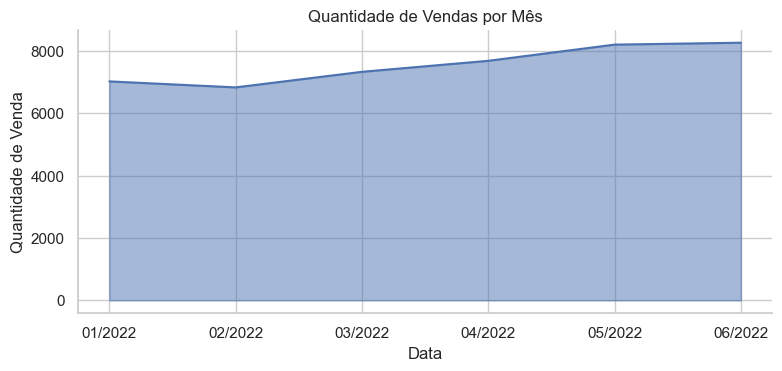

In [26]:


with sns.axes_style(style='whitegrid'):
    grafico = sns.FacetGrid(data=vendas_mes_df, palette='pastel')
    grafico.map(sns.lineplot, 'data_venda', 'qtd_vendida')
    grafico.map(plt.fill_between, 'data_venda', 'qtd_vendida', alpha=0.5)
    grafico.set(title= 'Quantidade de Vendas por Mês',xlabel='Data', ylabel='Quantidade de Venda')
    grafico.fig.set_size_inches(w=30/2.54, h=10/2.54)
    grafico.savefig('Grafico de Linha')

[Text(0.5, 0, 'SKU'), Text(0, 0.5, 'Quantidade')]

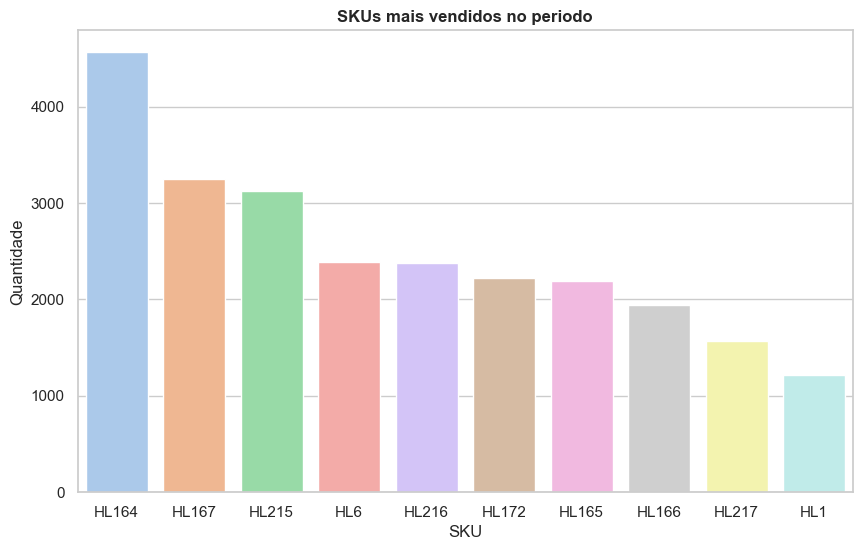

In [22]:
# grafico de barras

plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
grafico = sns.barplot(data=sku_df, x='SKU', y='qtd_vendida', order=sku_df['SKU'], palette='pastel')
grafico.set_title('SKUs mais vendidos no periodo', fontsize= 12, fontweight='bold' )
grafico.set(xlabel= 'SKU', ylabel='Quantidade')

# Salvar os dados gerados para uma planilha em excel

In [28]:
wb = load_workbook('Base Vendas - 2022.xlsx')
sheet = wb.active

In [30]:
new_ws = wb.create_sheet('resultados')
wb.save('Base Vendas - 2022.xlsx')

In [32]:
print(wb.sheetnames) 
print(wb.active)

['Plan1', 'resultados']
<Worksheet "Plan1">


In [35]:
resultados = wb['resultados']
print(resultados)

<Worksheet "resultados">


In [46]:
from openpyxl.utils.dataframe import dataframe_to_rows # permite converter um DataFrame do pandas em uma sequência de linhas que podem ser facilmente adicionadas a uma planilha do Excel.

# Verifica se a planilha já tem dados e, se sim, limpa a planilha para não duplicar os dados
if resultados.max_row > 1:
    resultados.delete_rows(1, resultados.max_row)

# Salva cada linha do dataframe na worksheet 
for r in dataframe_to_rows(sku_df, index=False, header=True): 
    resultados.append(r)

wb.save('Base Vendas - 2022.xlsx')